In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def detect_zebra_cross(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_white = np.array([0, 0, 200])
    upper_white = np.array([180, 30, 255])
    mask = cv2.inRange(hsv, lower_white, upper_white)

    kernel = np.ones((5, 5), np.uint8)
    opening = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    edges = cv2.Canny(opening, 50, 150)

    # Dilate the edges to connect nearby segments
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)

    lines = cv2.HoughLinesP(dilated_edges, 1, np.pi / 180, 100, minLineLength=40, maxLineGap=5)

    if lines is not None:
        line_image = np.zeros_like(image)
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 18)
        result = cv2.addWeighted(image, 1.0, line_image, 1.0, 0.0)
        return result
    else:
        return image


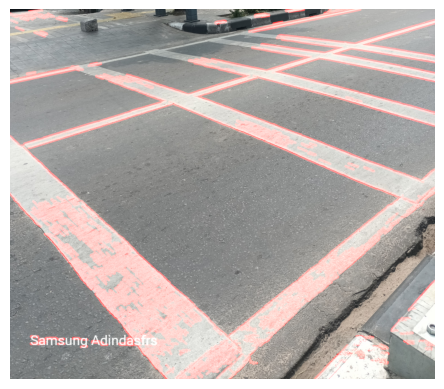

In [3]:
image = cv2.imread('jln.jpg')
result = detect_zebra_cross(image)

# Ubah mode warna BGR ke RGB untuk tampilan dengan plt
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

plt.imshow(result_rgb)
plt.axis('off')
plt.show()